## Vision-based Control (Part 1)

### Section 1: Image Representation (Images as Arrays)
We define how images are represented as arrays

#### 1.1 Import relevant Python packages

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#### 1.2 Load and display an image

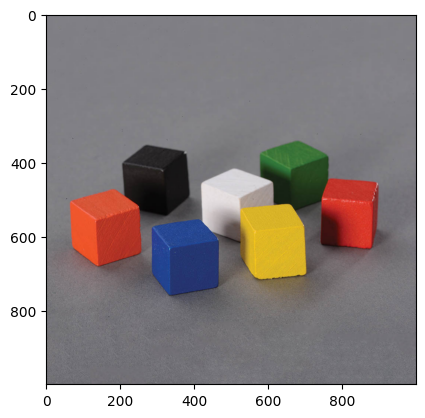

In [2]:
# path_to_image = '.\img\cubes.jpg' # Use this if you are on a Windows PC
path_to_image = './img/cubes.jpg'

# read the image from the directory
img = cv.imread(path_to_image)

# Convert from BGR (OpenCV's default) to RGB (Matplotlib's default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# display image
plt.imshow(img_rgb)
plt.show()

#### 1.3 Explore image properties

In [4]:
print('Image properties:')
print(f'Image type: {type(img_rgb)}')
print(f'Image shape: {img_rgb.shape}')
print(f'Image size: {img_rgb.size}')


Image properties:
Image type: <class 'numpy.ndarray'>
Image shape: (1000, 1000, 3)
Image size: 3000000


### Section 2: Basic Image Processing

1. Image cropping
2. Image resizing
3. Splitting image channels
4. Merging image channels
5. Converting to different color spaces
6. Pixel value distribution (image histogram)

1. Image cropping

Cropped image shape: (250, 250, 3)


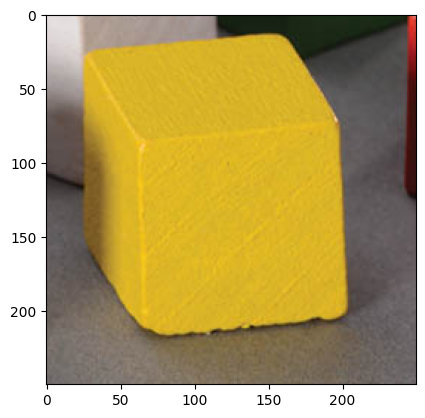

In [7]:
# TODO: Try to isolate the YELLOW cube

img_cropped = img_rgb[500:750, 500:750]
plt.imshow(img_cropped)
print(f'Cropped image shape: {img_cropped.shape}')

2. Resize image

Original image shape: (1000, 1000, 3)
Resized image shape: (2000, 2000, 3)


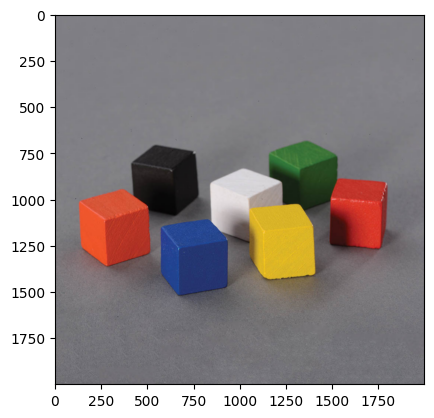

In [9]:
# TODO: Explore the cv.resize function

img_resize = cv.resize(img_rgb, [2000, 2000])

print(f'Original image shape: {img_rgb.shape}')
print(f'Resized image shape: {img_resize.shape}')

plt.imshow(img_resize)

3. Splitting the image channels

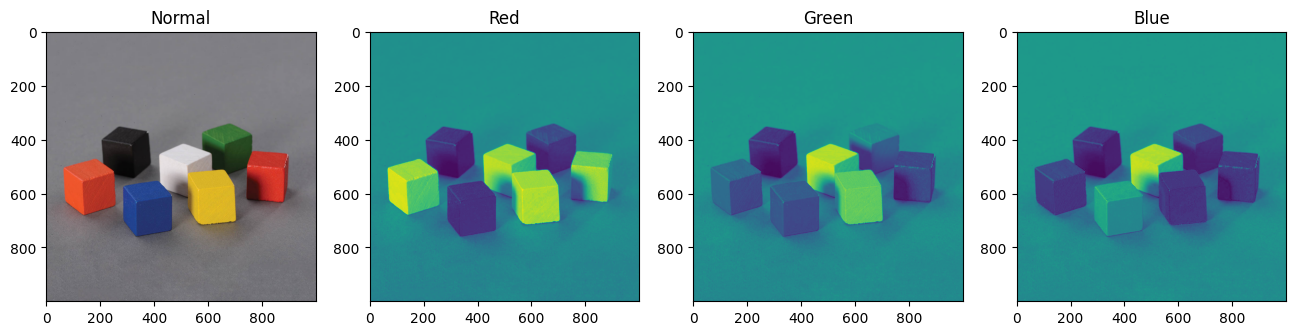

In [12]:
#TODO: RGB images have three (3) channels, use cv.split to isolate each channel and then display them all

channels = cv.split(img_rgb)
titles = ["Normal","Red","Green", "Blue"]

plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])

for i in range(len(channels)):
    plt.subplot(1,4,i+2)
    plt.imshow(channels[i])
    plt.title(titles[i+1])

plt.show()

4. Merging image channels

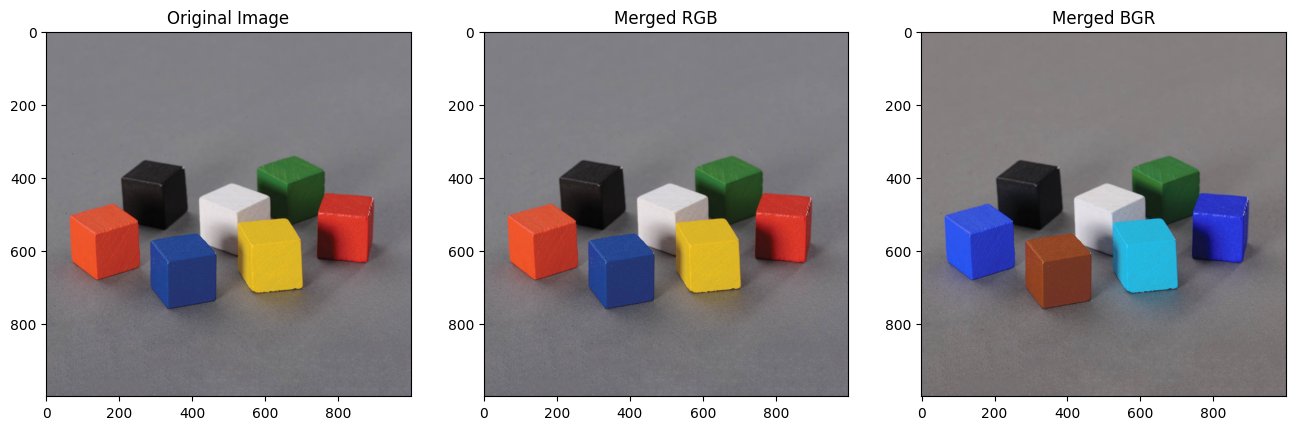

In [16]:
#TODO: What can be split can be merged. Use the cv.merge function to merge the individual channels together
red = channels[0]
green = channels[1]
blue = channels[2]
merged_img_rgb = cv.merge([red, green, blue])
merged_img_bgr = cv.merge([blue, green, red])

#TODO: Does the order of merging matter? Find out!

titles = ['Original Image', 'Merged RGB', 'Merged BGR']
plt.figure(figsize=(16, 6))
plt.subplot(1,3,1)
plt.imshow(img_rgb), plt.title(titles[0])
plt.subplot(1,3,2)
plt.imshow(merged_img_rgb), plt.title(titles[1])
plt.subplot(1,3,3)
plt.imshow(merged_img_bgr), plt.title(titles[2])

plt.show()

5. Converting to different color spaces

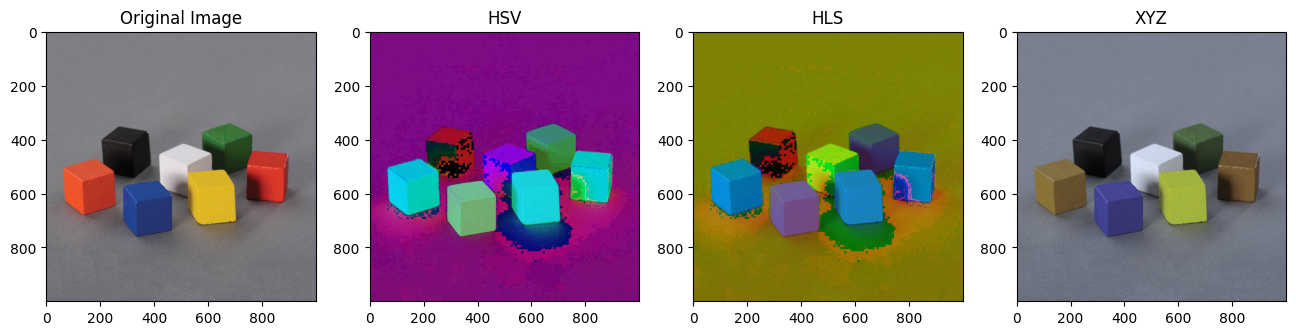

In [17]:
#TODO: Explore different color spaces. Plot the original image in at least 3 other color spaces

# Reference: https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html
hsv = cv.cvtColor(img_rgb, cv.COLOR_RGB2HSV)
hls = cv.cvtColor(img_rgb, cv.COLOR_RGB2HLS)
xyz = cv.cvtColor(img_rgb, cv.COLOR_RGB2XYZ)

titles = ['Original Image', 'HSV', 'HLS', "XYZ"]
plt.figure(figsize=(16, 6))
plt.subplot(1,4,1)
plt.imshow(img_rgb), plt.title(titles[0])
plt.subplot(1,4,2)
plt.imshow(hsv), plt.title(titles[1])
plt.subplot(1,4,3)
plt.imshow(hls), plt.title(titles[2])
plt.subplot(1,4,4)
plt.imshow(xyz), plt.title(titles[3])

plt.show()

6. Pixel value distribution

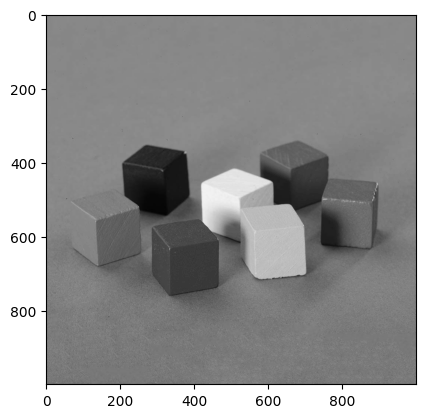

Min and Max pixel values are: [1, 240]


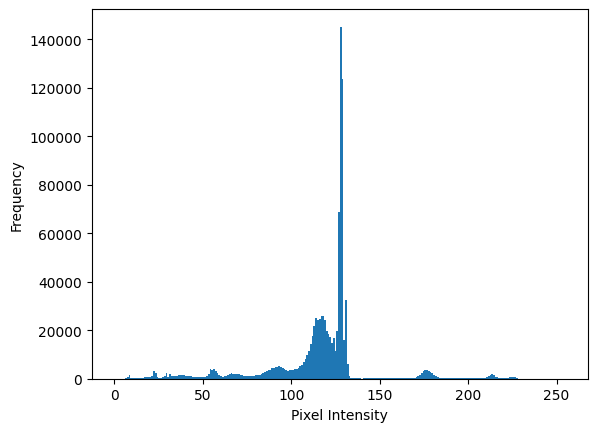

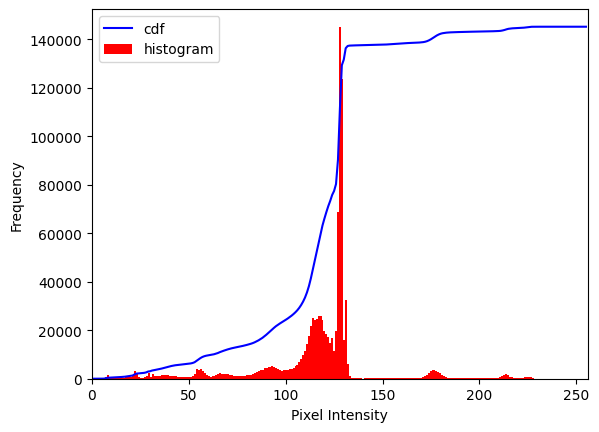

In [24]:
# TODO: Every pixel has a value (0, 255), let's explore the pixel value distribution

# TODO: 1. convert to grayscale
img_gray = cv.cvtColor(img_rgb, cv.COLOR_RGB2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.show()

# TODO: 2. find the min and max pixel value

print(f'Min and Max pixel values are: [{np.min(img_gray)}, {np.max(img_gray)}]')


# TODO: 3. create and plot the pixel value distribution as an image histogram
histSize = 256
histRange = (0, 255)
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1)
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()

# TODO: 4. determine the cumulative distribution and plot it against the pixel value distribution
hist, bins = np.histogram(img_gray.flatten(), histSize, histRange)
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(img_gray.flatten(), bins=histSize, range=histRange, alpha=1, color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.xlabel('Pixel Intensity'), plt.ylabel('Frequency')
plt.show()


### Section 3: Image Enhancement

1. Histogram equalization
2. Filtering

#### 1. Histogram equalization

Resource: https://docs.opencv.org/4.x/d5/daf/tutorial_py_histogram_equalization.html

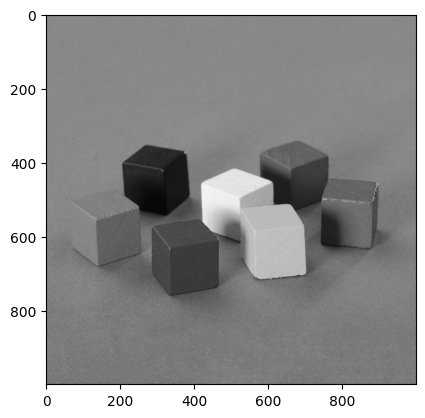

In [3]:
path_to_image = './img/cubes.jpg'
img_gray = cv.imread(path_to_image, cv.IMREAD_GRAYSCALE)

plt.imshow(img_gray, cmap='gray')



In [7]:
# TODO: Compute and plot the histogram and the cummulative distribution (use similar code as above)



In [ ]:
# TODO: Using the cv.equalizeHist, perform histogram equalization and plot the result


In [ ]:
# TODO: Compute and plot the histogram and the cummulative distribution of the equalized image (use similar code as above)

# Can you spot the difference??

#### 2. Image Filtering (smoothing)


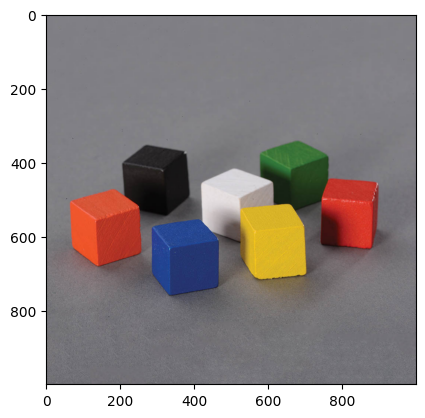

In [6]:
# Resource: https://docs.opencv.org/3.4/d4/d13/tutorial_py_filtering.html 
path_to_image = './img/cubes.jpg'
img = cv.imread(path_to_image)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
# TODO: Play around with different filters to get a good outcome


### Section 4. Pixel-wise Image Segmentation

1. Monochrome image classification (manual approach)
2. Monochrome image classification (adaptive approach and Otsu)
3. Color image classification


1. Monochrome image classification (manual approach)

In [ ]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Import cubes.jpg

# TODO: Inspect the pixel value distribution to determine a good threshold

# TODO: Use cv.threshold to apply a binary threshold on the image and plot the outcome 



2. Monochrome image classification (adaptive approach and Otsu)

In [ ]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use cv.adaptiveThreshold to apply a binary threshold on the image and plot the outcome


In [ ]:
# Resource: https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

# TODO: Use the otsu method to apply a binary threshold on the image and plot the outcome

# TODO: What are your observations?

3. Color image classification

Resource: https://realpython.com/python-opencv-color-spaces/ 

In [ ]:
# TODO: Follow the resource above to define a color mask

In [ ]:
# TODO: Could you apply the Otsu approach to this as well? Give it a try.


In [ ]:
# TODO: Morphological operations are super helpful in denoising and rounding out your mask.
# Resource: https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html



4. Bounding box and segmentation visualization

In [ ]:
# TODO: Use a combination of cv.findContours, cv.drawContours and OpenCV's bitwise operations to obtain a bounding box and segmentation visualization as in the image below.


## Example Solution

<img src=".\img\solution1.png" width="800">


## TODO
#### Generate an object detection solution for (i) the RED cubes, (ii) the YELLOW cubes
